In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df=pd.read_csv('../DATA/kc_house_data.csv')

In [3]:
len(df)

21597

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


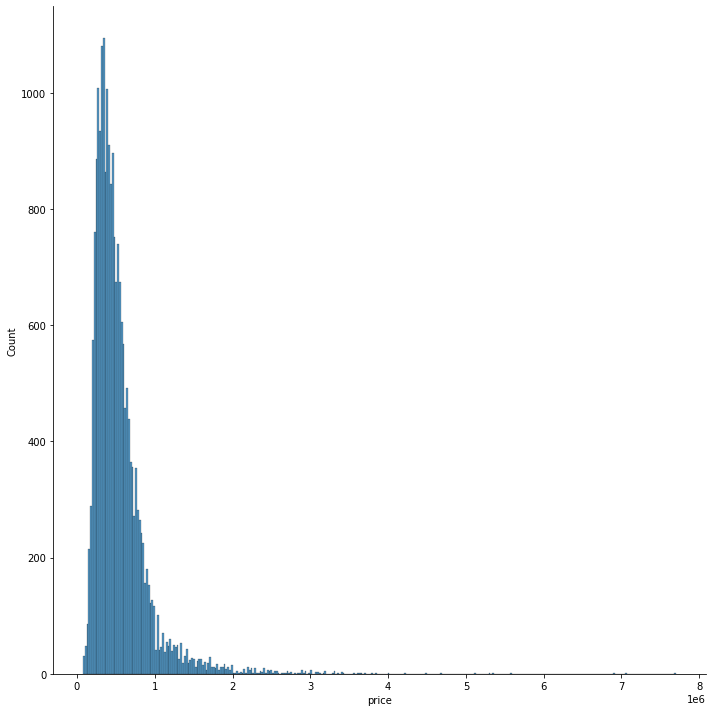

In [6]:

sns.displot(df['price'],height=10)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

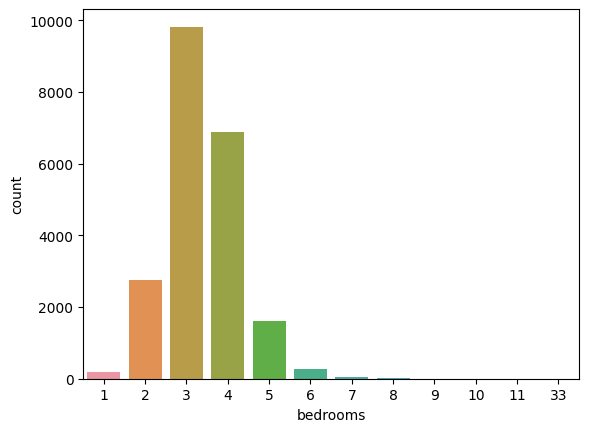

In [7]:
sns.countplot(x=df['bedrooms'])

In [8]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

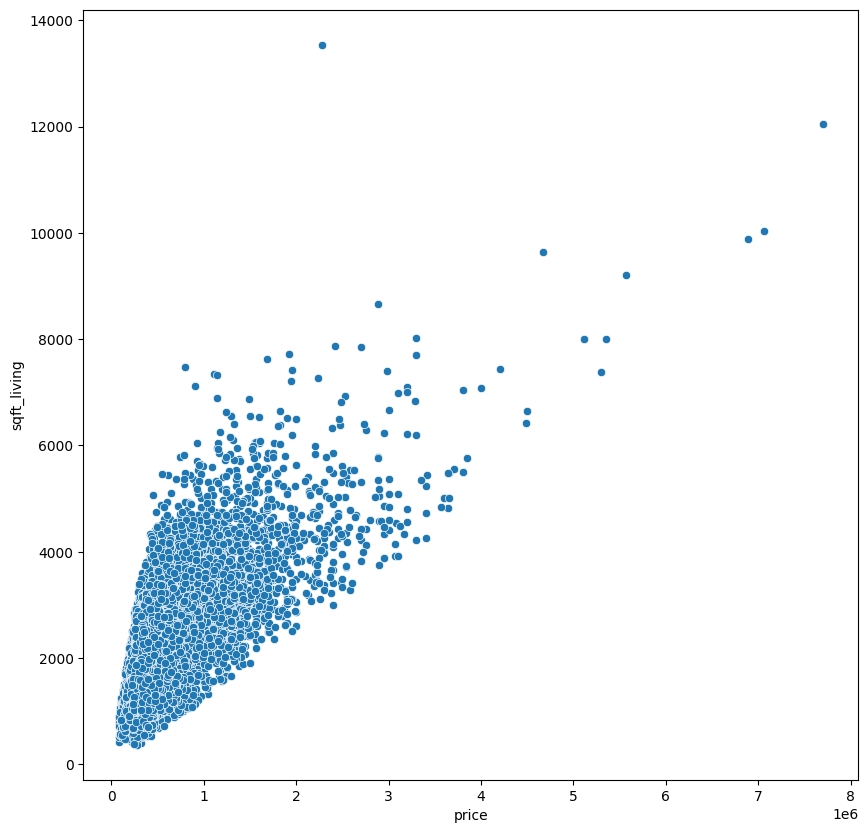

In [9]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['price'],y=df['sqft_living'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

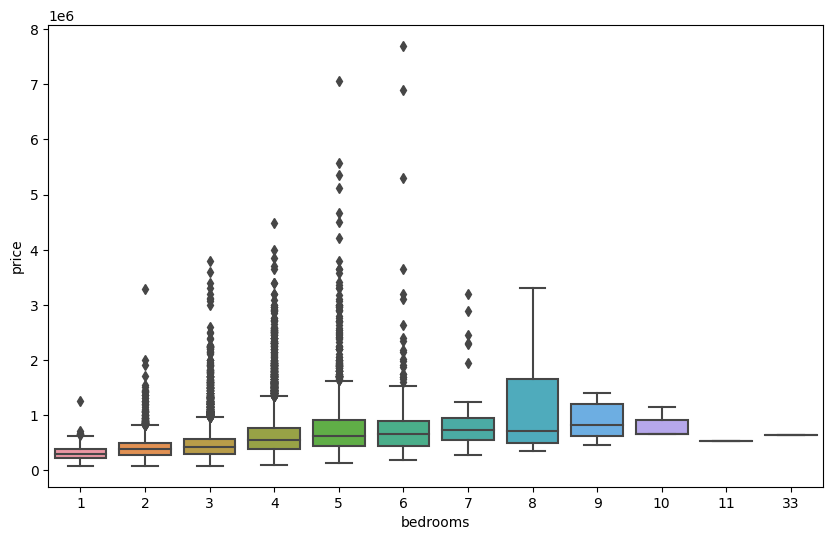

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

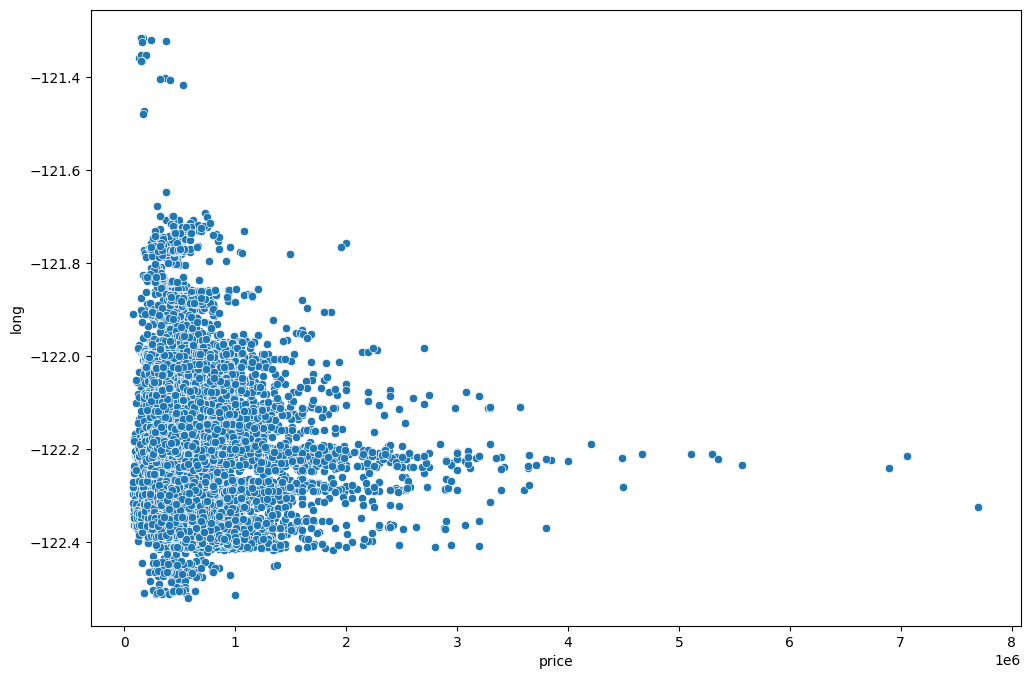

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

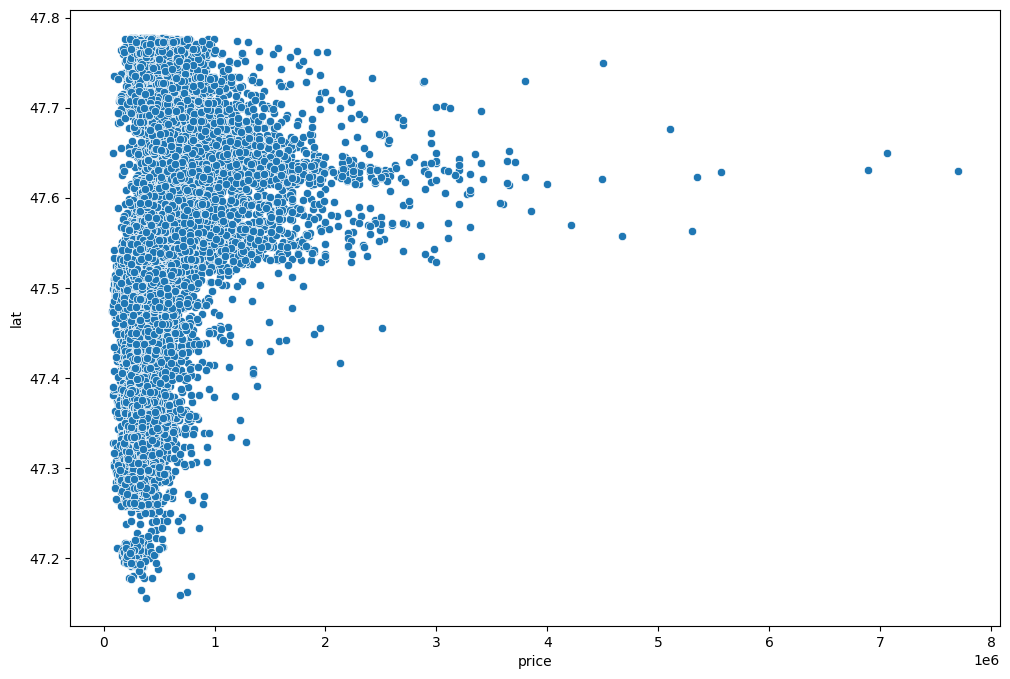

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

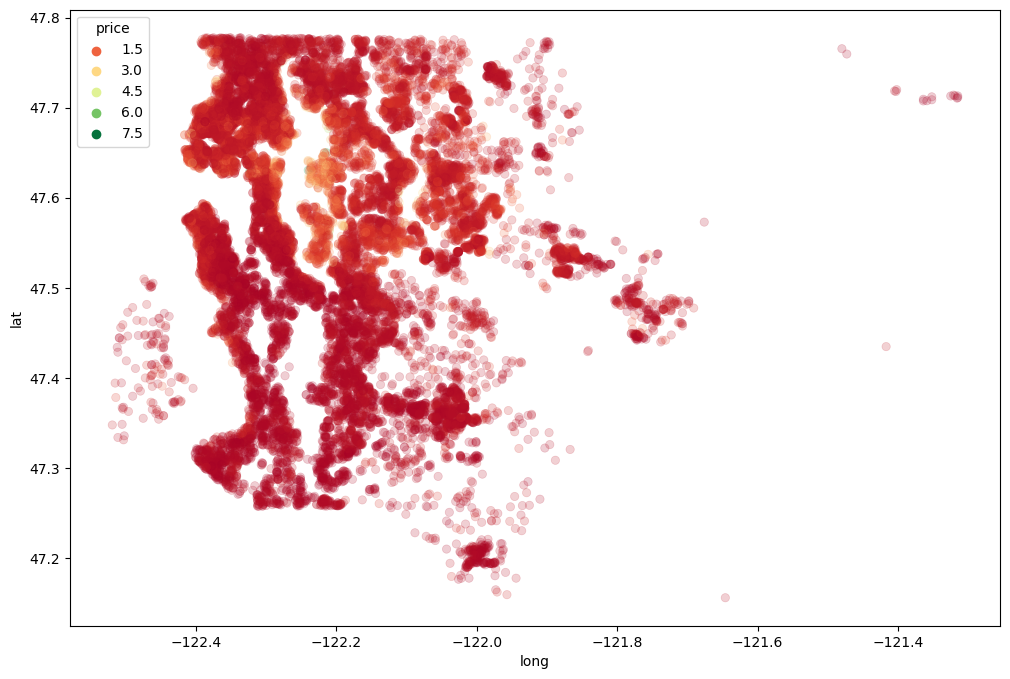

In [77]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='lat',x='long',hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn',data=df)

In [14]:
df.sort_values('price',ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [15]:
percentile99=df.sort_values('price',ascending=False).iloc[216:]

In [16]:
percentile99

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


<AxesSubplot:xlabel='long', ylabel='lat'>

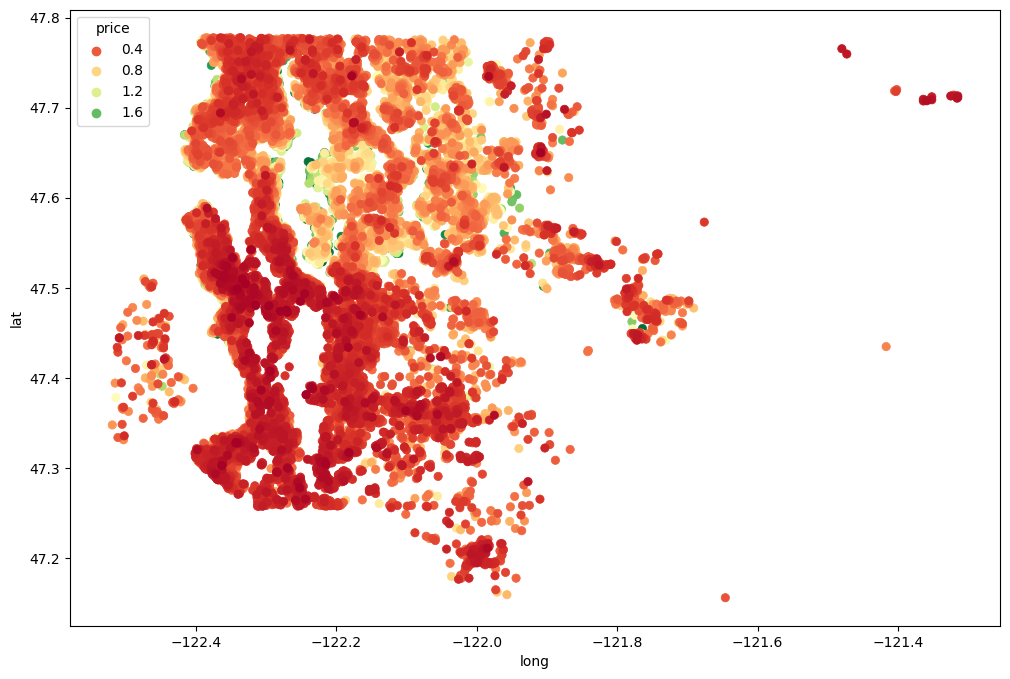

In [81]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='lat',x='long',hue='price',edgecolor=None,alpha=1,palette='RdYlGn',data=percentile99)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

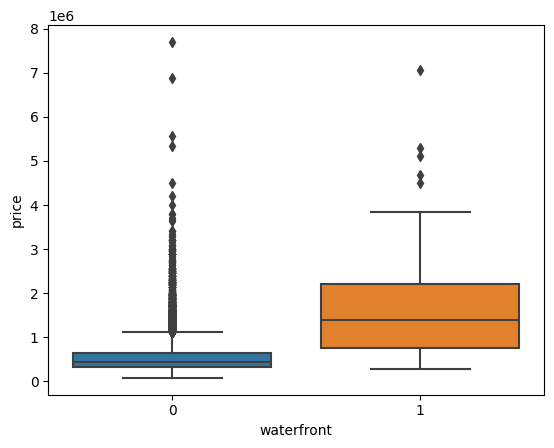

In [18]:
sns.boxplot(x='waterfront',y='price',data=df)

In [19]:
df=df.drop('id',axis=1)

In [20]:
df['date']=pd.to_datetime(df['date'])

In [21]:
df['year']=df['date'].apply(lambda date: date.year)
df['month']=df['date'].apply(lambda date: date.month)

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [23]:
df=df.drop('date',axis=1)

In [24]:
df=df.drop('zipcode',axis=1)

In [25]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [26]:
x=df.drop('price',axis=1).values
y=df['price'].values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler=MinMaxScaler()

In [31]:
x_train=scaler.fit_transform(x_train)

In [32]:
x_test = scaler.transform(x_test)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
x_train.shape

(15117, 19)

In [35]:
model =Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [36]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          batch_size=128,
          epochs=300)

Epoch 1/300
119/119 [==============================] - 2s 2ms/step - loss: 430205501440.0000 - val_loss: 418658222080.0000
Epoch 2/300
119/119 [==============================] - 0s 1ms/step - loss: 421152260096.0000 - val_loss: 381646045184.0000
Epoch 3/300
119/119 [==============================] - 0s 1ms/step - loss: 265947136000.0000 - val_loss: 110642315264.0000
Epoch 4/300
119/119 [==============================] - 0s 1ms/step - loss: 100339965952.0000 - val_loss: 94089519104.0000
Epoch 5/300
119/119 [==============================] - 0s 1ms/step - loss: 95655608320.0000 - val_loss: 90871283712.0000
Epoch 6/300
119/119 [==============================] - 0s 1ms/step - loss: 92299681792.0000 - val_loss: 87714529280.0000
Epoch 7/300
119/119 [==============================] - 0s 1ms/step - loss: 88805400576.0000 - val_loss: 84436574208.0000
Epoch 8/300
119/119 [==============================] - 0s 1ms/step - loss: 85116600320.0000 - val_loss: 80685162496.0000
Epoch 9/300
119/119 [====

Epoch 135/300
119/119 [==============================] - 0s 1ms/step - loss: 30536749056.0000 - val_loss: 28494628864.0000
Epoch 136/300
119/119 [==============================] - 0s 1ms/step - loss: 30524346368.0000 - val_loss: 28523307008.0000
Epoch 137/300
119/119 [==============================] - 0s 1ms/step - loss: 30519031808.0000 - val_loss: 28488724480.0000
Epoch 138/300
119/119 [==============================] - 0s 1ms/step - loss: 30482792448.0000 - val_loss: 28484804608.0000
Epoch 139/300
119/119 [==============================] - 0s 1ms/step - loss: 30415851520.0000 - val_loss: 28453005312.0000
Epoch 140/300
119/119 [==============================] - 0s 1ms/step - loss: 30397618176.0000 - val_loss: 28428251136.0000
Epoch 141/300
119/119 [==============================] - 0s 1ms/step - loss: 30381117440.0000 - val_loss: 28366948352.0000
Epoch 142/300
119/119 [==============================] - 0s 1ms/step - loss: 30434433024.0000 - val_loss: 28435716096.0000
Epoch 143/300
11

119/119 [==============================] - 0s 1ms/step - loss: 27869827072.0000 - val_loss: 25431652352.0000
Epoch 268/300
119/119 [==============================] - 0s 1ms/step - loss: 27839072256.0000 - val_loss: 25449555968.0000
Epoch 269/300
119/119 [==============================] - 0s 1ms/step - loss: 27878580224.0000 - val_loss: 25325852672.0000
Epoch 270/300
119/119 [==============================] - 0s 1ms/step - loss: 27827763200.0000 - val_loss: 25393033216.0000
Epoch 271/300
119/119 [==============================] - 0s 1ms/step - loss: 27836780544.0000 - val_loss: 25299734528.0000
Epoch 272/300
119/119 [==============================] - 0s 1ms/step - loss: 27867293696.0000 - val_loss: 25283823616.0000
Epoch 273/300
119/119 [==============================] - 0s 1ms/step - loss: 27776266240.0000 - val_loss: 25436573696.0000
Epoch 274/300
119/119 [==============================] - 0s 1ms/step - loss: 27717601280.0000 - val_loss: 25304184832.0000
Epoch 275/300
119/119 [=======

In [37]:
losess=pd.DataFrame(model.history.history)

<AxesSubplot:>

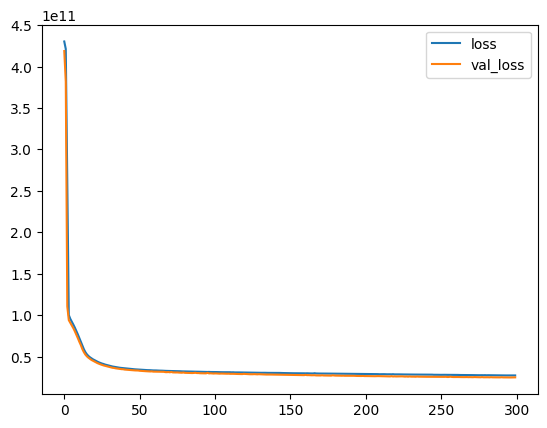

In [38]:
losess.plot()

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [40]:
predictions=model.predict(x_test)

203/203 [==============================] - 0s 510us/step


In [41]:
mean_squared_error(y_test,predictions)**0.5

158391.16765813195

In [42]:
mean_absolute_error(y_test,predictions)

99394.97857349538

In [43]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [44]:
explained_variance_score(y_test,predictions)

0.8120740046296082

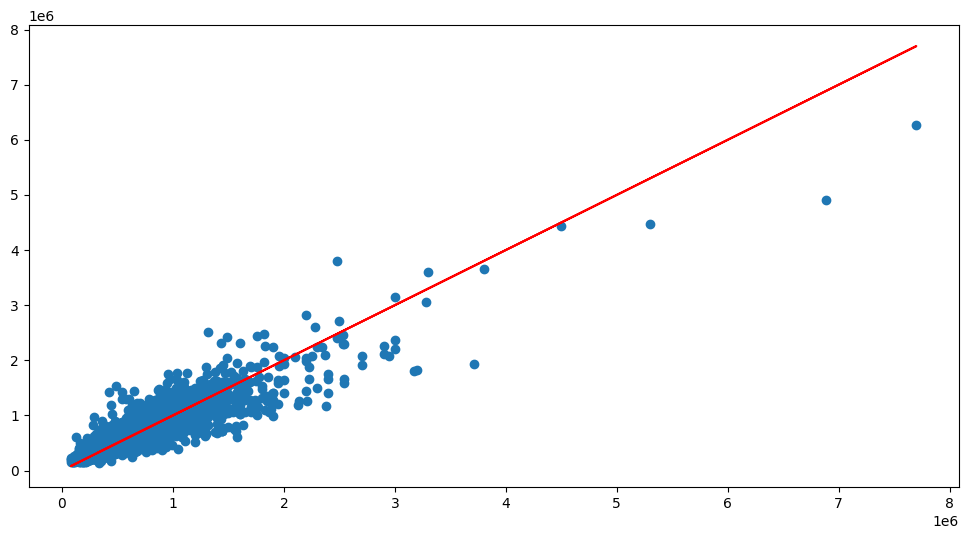

In [45]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,color='red')

In [46]:
single_house=df.drop('price',axis=1).iloc[0]

In [47]:
single_house=scaler.transform(single_house.values.reshape(-1,19))

In [48]:
model.predict(single_house)

1/1 [==============================] - 0s 134ms/step


array([[293293.38]], dtype=float32)

In [49]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [70]:
from tensorflow.keras.models import load_model
from sklearn.linear_model import LinearRegression

In [48]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [55]:
prediction=LR.predict(x_test)

In [56]:
LR.predict(x_test)

array([360280.53924278, 611058.57906985, 593021.12377354, ...,
       396126.71693765, 629169.42244091, 762351.35123771])

In [51]:
y_test

array([ 319000.,  464625.,  489950., ...,  422500.,  435000., 1230000.])

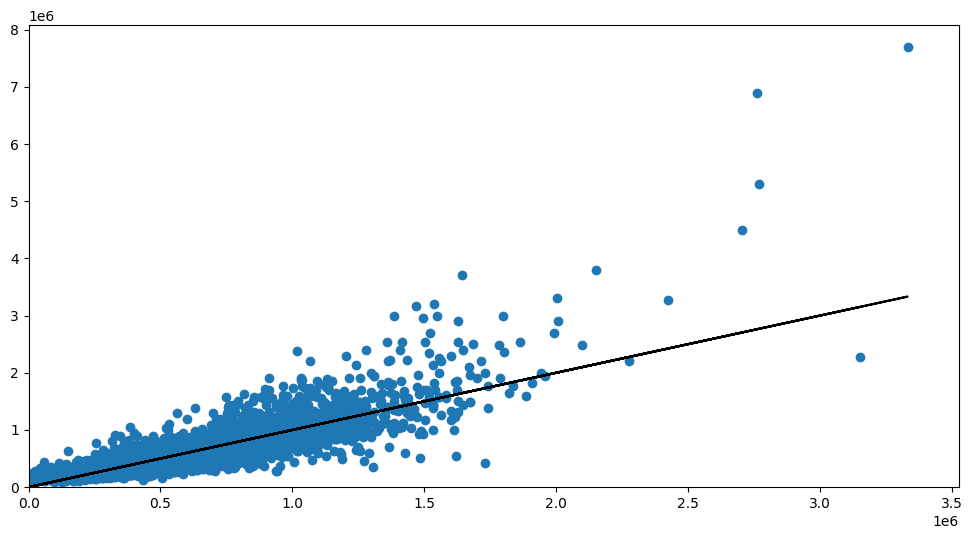

In [94]:
plt.figure(figsize=(12,6))
plt.scatter(prediction,y_test,label='Actual Price')
plt.xlim(0,)
plt.ylim(0,)
plt.plot(prediction,prediction,label='Linear Regression',color='black')


In [84]:
explained_variance_score(y_test,prediction)

0.6951152235392806

In [ ]:
model.save('Regression_model.h5') 